# Balanced Risk Set Matching (Li et al., 2001)

This is a study of treatment, cystoscopy, and hydrodistention, given in response to the symptoms of the chronic, nonlethal disease interstitial cystitis. The idea of the journal is to match the treatment of the patient with a similar history of symptoms who have different times receiving their treatment. It is described as time $t$ for when the patient received their treatment.

## Matching To Achieve Comparable Histories

Patients are evaluated at intervals of approximately every 2 months thereafter for up to 4 years. Three quantities are measured repeatedly over time:

- Pain
- Urgency
- Nocturnal FrequencyA

Pain and urgency are subjective appraisals on a scale from -1 - 9.A

If patient $m$ received the treatment at time $T_m$, then compare the response of this patient to a patient who did not recieve the treatment up to time $T_m$, but if otherwise the patient appeared similar during that pre-treatment interval, that is, who had a similar history of symptoms. Or at least, one would like treated and control groups whose aggregate distributuions of symtoms were similar.

Let $S$ be matched pairs, $s = 1$, $\dots$, $S$, containing $2S$ distinct patients, such that the treated patient in pair $s$ recieved the treatment at time $T_s$, and the control in pair $s$ either did not receive the treatment at all or recieved it stricly after $T_s$.

## Optimal Balanced Matching

The optimal pair matching problem involves a finite set $\mathcal{A} = { \alpha_1, \dots, \alpha_M }$ called units, a subset $\mathcal{T} \subseteq \mathcal{A}$ called treated units, and a subset of their direct product $\varepsilon \subseteq \mathcal{T} \times \mathcal{A}$ called edges. If the pair $e = (\alpha_p, \alpha_q)$ is an edge $e \in \varepsilon$, then it is permitted to match $\alpha_p$ to $\alpha_q$, but if $e \not\in \varepsilon$, then this match is forbidden.

$\mathcal{T} \subseteq \mathcal{A}$ consists of all patients in the sample who eventually received the treatment. The pair $e = (\alpha_p, \alpha_q)$ is an edge $e \in \varepsilon$ if $\alpha_p$ received the treatment, say at time $\mathcal{T}_p$, and $\alpha_q$ either never received the treatment or received it strictly after time $\mathcal{T}_p$. Set $\varepsilon$ may exclude certain pairs for additional reasons, such as being too far apart on an important covariate. Without a risk set in a study in which everyone receives either treatment or control immediately at baseline; then $\mathcal{T}$ contains the treated subjects, $\mathcal{A} - \mathcal{T}$ contains the controls, and $\varepsilon \subseteq \mathcal{T} \times (\mathcal{A} - \mathcal{T})$ requires treated subects to be matched to untreated controls.

## Graphical Comparisons

$S = 100$ matched pairs. There are three variables, pain score, urgency score, and nocturnal frequency. A patient is pair to their matched not-yet-treated data.

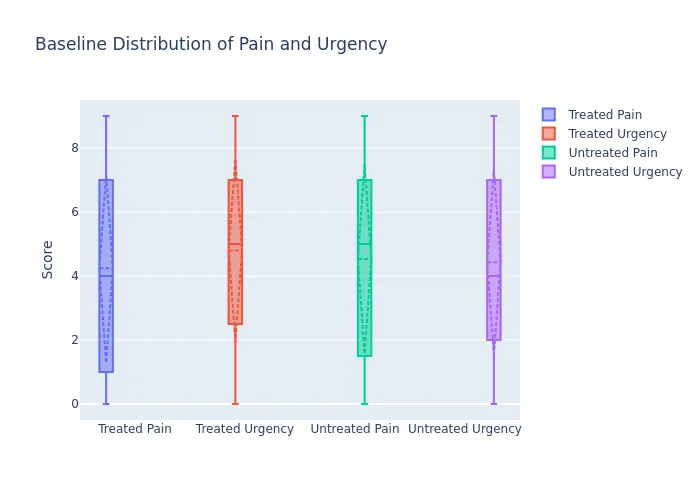

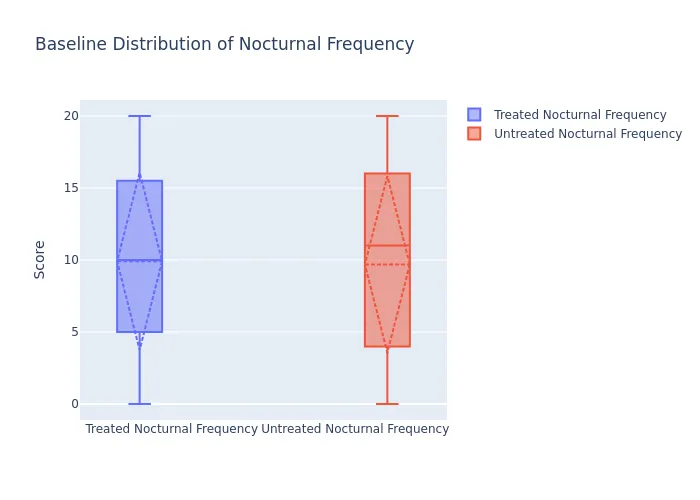

In [9]:
import plotly.graph_objects as go
from IPython.display import display, Image

# Data is not imported from any database, but is generated with random values
# with a specific seed. This is to ensure that the data is consistent across
# all runs of the script.
from defs import patients_baseline

fig_scores = go.Figure()

for group, data in patients_baseline.groupby("group"):
    fig_scores.add_trace(
        go.Box(
            y=data["pain"],
            name=f"{group.capitalize()} Pain",
            boxmean="sd",
        )
    )

    fig_scores.add_trace(
        go.Box(
            y=data["urgency"],
            name=f"{group.capitalize()} Urgency",
            boxmean="sd",
        )
    )

fig_scores.update_layout(
    title="Baseline Distribution of Pain and Urgency",
    yaxis_title="Score",
    boxmode="group",
)

fig_scores.write_image("assets/figure-1.webp")
display(Image("assets/figure-1.webp"))

fig_nocturnal = go.Figure()

for group, data in patients_baseline.groupby("group"):
    fig_nocturnal.add_trace(
        go.Box(
            y=data["nocturnal frequency"],
            name=f"{group.capitalize()} Nocturnal Frequency",
            boxmean="sd",
        )
    )

fig_nocturnal.update_layout(
    title="Baseline Distribution of Nocturnal Frequency",
    yaxis_title="Score",
    boxmode="group",
)

fig_nocturnal.write_image("assets/figure-2.webp")
display(Image("assets/figure-2.webp"))


## References

Li, Y. P., Propert, K. J., & Rosenbaum, P. R. (2001). Balanced risk set matching. Journal of the American Statistical Association, 96(455), 870–882. https://doi.org/10.1198/016214501753208573